In [6]:
import tensorflow as tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as numpy

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

y_train[0] 


array([6], dtype=uint8)

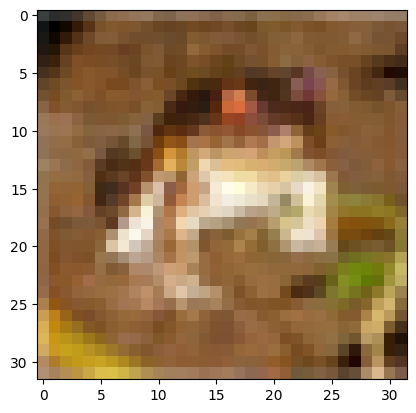

In [8]:
plt.imshow(X_train[0])


In [9]:
y_train[:5] # displaying first 5 rows. 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
# Optional but you can define a function
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

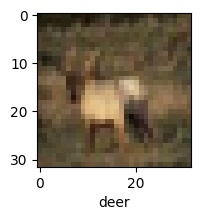

In [13]:
plot_sample(X_train, y_train, 3)

In [14]:
# To get  the RGB Values from 0 to 255 so we need to normalize it. For faster computation
X_train = X_train / 255.0
X_test = X_test / 255.0


In [15]:
# Build a basic classification system
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)


c:\Users\Acer Aspire 7\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.3013 - loss: 1.9312
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.4198 - loss: 1.6369
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.4569 - loss: 1.5469
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4747 - loss: 1.4826
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.5017 - loss: 1.4261


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      1000
           1       0.49      0.76      0.60      1000
           2       0.37      0.32      0.35      1000
           3       0.39      0.10      0.16      1000
           4       0.36      0.52      0.42      1000
           5       0.34      0.52      0.41      1000
           6       0.56      0.47      0.51      1000
           7       0.66      0.43      0.52      1000
           8       0.56      0.65      0.60      1000
           9       0.69      0.31      0.43      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [38]:
# let's make cnn model now.....
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3939 - loss: 1.6853
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5991 - loss: 1.1396
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6581 - loss: 0.9862
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6975 - loss: 0.8708
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7225 - loss: 0.8038
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7412 - loss: 0.7444
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7586 - loss: 0.6827
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7774 - loss: 0.6349
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7934 - loss: 0.5951
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8083 - loss: 0.5488


In [39]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6993 - loss: 0.9545


[0.9646485447883606, 0.697700023651123]

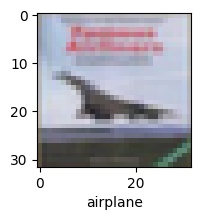

In [41]:
plot_sample(X_test, y_test, 3)

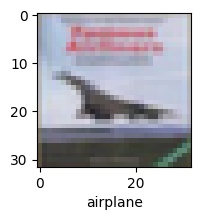

In [42]:
plot_sample(X_test, y_test, 3)